In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Alpha cnt

In [3]:
NUM_CLASSES = 27

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 27)                297       
                                                                 
Total params: 1367 (5.34 KB)
Trainable params: 1367 (5.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=25, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model train

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/7 [===>..........................] - ETA: 8s - loss: 3.4040 - accuracy: 0.0234
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 2s 72ms/step - loss: 3.4305 - accuracy: 0.0203 - val_loss: 3.3812 - val_accuracy: 0.0304
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 3.3745 - accuracy: 0.0156
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 16ms/step - loss: 3.3907 - accuracy: 0.0203 - val_loss: 3.3500 - val_accuracy: 0.0304
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 3.4176 - accuracy: 0.0234

c:\Users\Tirth Kothari\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 18ms/step - loss: 3.3536 - accuracy: 0.0267 - val_loss: 3.3271 - val_accuracy: 0.0304
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - loss: 3.3251 - accuracy: 0.0312
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 16ms/step - loss: 3.3146 - accuracy: 0.0267 - val_loss: 3.3104 - val_accuracy: 0.0304
Epoch 5/1000
1/7 [===>..........................] - ETA: 0s - loss: 3.2723 - accuracy: 0.0234
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 3.3054 - accuracy: 0.0241 - val_loss: 3.2972 - val_accuracy: 0.0000e+00
Epoch 6/1000
1/7 [===>..........................] - ETA: 0s - loss: 3.2840 - accuracy: 0.0156
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [====================

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 6ms/step - loss: 0.9892 - accuracy: 0.6996


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 154ms/step
[7.3152198e-04 1.2456423e-10 2.2885220e-02 3.3734581e-03 3.0199146e-08
 1.3165612e-05 3.9126060e-04 8.1487961e-02 1.2231432e-03 4.7883476e-15
 6.4331852e-11 3.9766374e-07 5.3641636e-02 5.7961706e-02 3.2268139e-03
 3.0663386e-01 3.7988904e-01 6.7972427e-04 1.4341011e-03 2.4908180e-08
 5.1495289e-07 6.3423640e-09 5.5545904e-02 3.0880481e-02 2.9974046e-14
 1.5767528e-09 1.0445328e-08]
16


# Conf mat

9/9 [==============================] - 0s 2ms/step


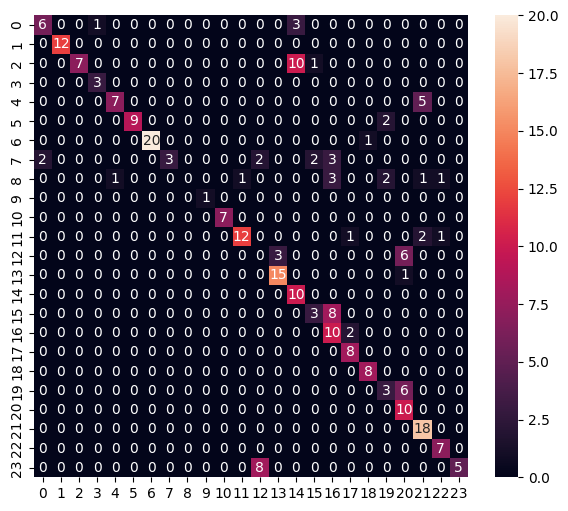

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       1.00      1.00      1.00        12
           2       1.00      0.39      0.56        18
           3       0.75      1.00      0.86         3
           4       0.88      0.58      0.70        12
           5       1.00      0.82      0.90        11
           6       1.00      0.95      0.98        21
           7       1.00      0.25      0.40        12
           8       0.00      0.00      0.00         9
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         7
          11       0.92      0.75      0.83        16
          12       0.00      0.00      0.00         9
          13       0.83      0.94      0.88        16
          14       0.43      1.00      0.61        10
          15       0.50      0.27      0.35        11
          16       0.42      0.83      0.56        12
     

c:\Users\Tirth Kothari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tirth Kothari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tirth Kothari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\Tirth Kothari\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Tirth Kothari\AppData\Local\Temp\tmpbqy8bb60\assets


INFO:tensorflow:Assets written to: C:\Users\Tirth Kothari\AppData\Local\Temp\tmpbqy8bb60\assets


7556

# error solve

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.3152198e-04 1.2456398e-10 2.2885226e-02 3.3734578e-03 3.0199093e-08
 1.3165598e-05 3.9126043e-04 8.1488028e-02 1.2231419e-03 4.7883471e-15
 6.4331734e-11 3.9766257e-07 5.3641632e-02 5.7961661e-02 3.2268136e-03
 3.0663398e-01 3.7988904e-01 6.7972357e-04 1.4340992e-03 2.4908129e-08
 5.1495283e-07 6.3423391e-09 5.5545837e-02 3.0880507e-02 2.9974046e-14
 1.5767528e-09 1.0445308e-08]
16
